In [61]:
import numpy as np
import pandas as pd

In [130]:
# Load Kaggle Data as matrix
loaded_train_csv_data = pd.read_csv('./(191116)titanic_train.csv')

loaded_train_csv_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
# Load Kaggle Data as matrix
loaded_test_csv_data = pd.read_csv('./(191116)titanic_test.csv')

loaded_test_csv_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
# Load Kaggle Data as matrix
loaded_test_csv_sub = pd.read_csv('./(191116)titanic_gender_submission.csv')

loaded_test_csv_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [133]:
sliced_train_data = loaded_train_csv_data.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin'], axis = 1)
sliced_train_data

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [134]:
sliced_test_data = loaded_test_csv_data.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin'], axis = 1)
sliced_test_data

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,0,0,Q
1,3,female,1,0,S
2,2,male,0,0,Q
3,3,male,0,0,S
4,3,female,1,1,S
...,...,...,...,...,...
413,3,male,0,0,S
414,1,female,0,0,C
415,3,male,0,0,S
416,3,male,0,0,S


In [135]:
sliced_test_sub = loaded_test_csv_sub.drop(['PassengerId'], axis = 1)
sliced_test_sub

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [136]:
train_csv_data = sliced_train_data.values
test_csv_data = sliced_test_data.values
test_csv_sub = sliced_test_sub.values

In [137]:
print('train_csv_data.shape = ', train_csv_data.shape, ', type(train_csv_data) = ', type(train_csv_data))
print('\n', train_csv_data[0], '\n')

# 각 column 내용 확인
for column_index in range(len(train_csv_data[0])):
    print('value = ', train_csv_data[0, column_index], ', type(column) = ', type(train_csv_data[0, column_index]))

train_csv_data.shape =  (891, 6) , type(train_csv_data) =  <class 'numpy.ndarray'>

 [0 3 'male' 1 0 'S'] 

value =  0 , type(column) =  <class 'int'>
value =  3 , type(column) =  <class 'int'>
value =  male , type(column) =  <class 'str'>
value =  1 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  S , type(column) =  <class 'str'>


In [138]:
print('test_csv_data.shape = ', test_csv_data.shape, ', type(test_csv_data) = ', type(test_csv_data))
print('\n', test_csv_data[0], '\n')

# 각 column 내용 확인
for column_index in range(len(test_csv_data[0])):
    print('value = ', test_csv_data[0, column_index], ', type(column) = ', type(test_csv_data[0, column_index]))

test_csv_data.shape =  (418, 5) , type(test_csv_data) =  <class 'numpy.ndarray'>

 [3 'male' 0 0 'Q'] 

value =  3 , type(column) =  <class 'int'>
value =  male , type(column) =  <class 'str'>
value =  0 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  Q , type(column) =  <class 'str'>


### 문자 -> 숫자

#### 성별

In [139]:
# train data 에서 male -> 1, female -> 0
for i in range(len(train_csv_data)):    
    if train_csv_data[i, 2] == 'male':        
        train_csv_data[i, 2] = 1    
    else:        
        train_csv_data[i, 2] = 0
        
# test data 에서 male -> 1, female -> 0
for i in range(len(test_csv_data)):    
    if test_csv_data[i, 1] == 'male':        
        test_csv_data[i, 1] = 1    
    else:        
        test_csv_data[i, 1] = 0

In [140]:
# 각 column 내용 확인
for column_index in range(len(train_csv_data[0])):
    print('value = ', train_csv_data[0, column_index], ', type(column) = ', type(train_csv_data[0, column_index]))

value =  0 , type(column) =  <class 'int'>
value =  3 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  S , type(column) =  <class 'str'>


In [141]:
# 각 column 내용 확인
for column_index in range(len(test_csv_data[0])):
    print('value = ', test_csv_data[0, column_index], ', type(column) = ', type(test_csv_data[0, column_index]))

value =  3 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  Q , type(column) =  <class 'str'>


#### Embarked

In [142]:
# train data 에서 Embarked, Empty -> 0, S -> 1, C -> 2, Q -> 3
for i in range(len(train_csv_data)):    
    if train_csv_data[i, 5] == 'S':        
        train_csv_data[i, 5] = 1        
    elif train_csv_data[i, 5] == 'C':        
        train_csv_data[i, 5] = 2        
    elif train_csv_data[i, 5] == 'Q':        
        train_csv_data[i, 5] = 3        
        
    if np.isnan(train_csv_data[i, 5]):        
        train_csv_data[i, 5] = 0
        
# test data 에서 Embarked, Empty -> 0, S -> 1, C -> 2, Q -> 3
for i in range(len(test_csv_data)):    
    if test_csv_data[i, 4] == 'S':        
        test_csv_data[i, 4] = 1        
    elif test_csv_data[i, 4] == 'C':        
        test_csv_data[i, 4] = 2        
    elif test_csv_data[i, 4] == 'Q':        
        test_csv_data[i, 4] = 3        
        
    if np.isnan(test_csv_data[i, 4]):        
        test_csv_data[i, 4] = 0

In [103]:
# 각 column 내용 확인
for column_index in range(len(train_csv_data[0])):
    print('value = ', train_csv_data[0, column_index], ', type(column) = ', type(train_csv_data[0, column_index]))

value =  0 , type(column) =  <class 'int'>
value =  3 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>


In [143]:
# 각 column 내용 확인
for column_index in range(len(test_csv_data[0])):
    print('value = ', test_csv_data[0, column_index], ', type(column) = ', type(test_csv_data[0, column_index]))

value =  3 , type(column) =  <class 'int'>
value =  1 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  0 , type(column) =  <class 'int'>
value =  3 , type(column) =  <class 'int'>


In [146]:
# 각 column 내용 확인
for column_index in range(len(test_csv_sub[0])):
    print('value = ', test_csv_sub[0, column_index], ', type(column) = ', type(test_csv_sub[0, column_index]))

value =  0 , type(column) =  <class 'numpy.int64'>


In [144]:
train_csv_data = train_csv_data.astype(np.float32)

for column_index in range(len(train_csv_data[0])):
    print('value = ', train_csv_data[0, column_index], ', type(column) = ', type(train_csv_data[0, column_index]))

value =  0.0 , type(column) =  <class 'numpy.float32'>
value =  3.0 , type(column) =  <class 'numpy.float32'>
value =  1.0 , type(column) =  <class 'numpy.float32'>
value =  1.0 , type(column) =  <class 'numpy.float32'>
value =  0.0 , type(column) =  <class 'numpy.float32'>
value =  1.0 , type(column) =  <class 'numpy.float32'>


In [145]:
test_csv_data = test_csv_data.astype(np.float32)

for column_index in range(len(test_csv_data[0])):
    print('value = ', test_csv_data[0, column_index], ', type(column) = ', type(test_csv_data[0, column_index]))

value =  3.0 , type(column) =  <class 'numpy.float32'>
value =  1.0 , type(column) =  <class 'numpy.float32'>
value =  0.0 , type(column) =  <class 'numpy.float32'>
value =  0.0 , type(column) =  <class 'numpy.float32'>
value =  3.0 , type(column) =  <class 'numpy.float32'>


In [147]:
test_csv_sub = test_csv_sub.astype(np.float32)

for column_index in range(len(test_csv_sub[0])):
    print('value = ', test_csv_sub[0, column_index], ', type(column) = ', type(test_csv_sub[0, column_index]))

value =  0.0 , type(column) =  <class 'numpy.float32'>


### Training Data 분리

In [148]:
training_x_data = train_csv_data[ :, 1:]
training_t_data = train_csv_data[ :,[0]]

test_x_data = test_csv_data[:, :]
test_t_data = test_csv_sub[:, :]

print("training_x_data.shape = ", training_x_data.shape, ", training_t_data.shape = ", training_t_data.shape)
print("test_x_data.shape = ", test_x_data.shape, ", test_t_data.shape = ", test_t_data.shape)

training_x_data.shape =  (891, 5) , training_t_data.shape =  (891, 1)
test_x_data.shape =  (418, 5) , test_t_data.shape =  (418, 1)


## Training

In [110]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [111]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class Kaggle_Titanic:
    
    def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 =  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        # name 초기화
        self.name = name
        
        print(self.name, " object is created !!!")
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    # accuracy method
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        temp_list = []
        
        for index in range(len(input_data)):
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            # dtype=np.float32 해주지 않으면 sigmoid 에서 Numpy AttributeError: 'float' object has no attribute 'exp' 발생함
            # 해결방법 소스
            # https://stackoverflow.com/questions/18557337/numpy-attributeerror-float-object-has-no-attribute-exp/18568056
            (real_val, predicted_num) = self.predict(np.array(input_data[index], dtype=np.float32, ndmin=2)) 
            
            if predicted_num == target_data[index]:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(target_data[index])
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        accuracy_result = len(matched_list) / len(input_data)
            
        print("Accuracy => ", accuracy_result)
            
        return matched_list, not_matched_list, index_label_prediction_list
    
    # train method
    def train(self, input_data, target_data):   
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨     
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        y = A3 = sigmoid(Z3)
        
        if y >= 0.5:
            predicted_num = 1
        else:
            predicted_num = 0
    
        return y, predicted_num

In [151]:
i_nodes = training_x_data.shape[1]
h1_nodes = 100  # hidden nodes 개수
o_nodes = 1    # output nodes 개수
lr = 1e-2      # learning rate
epochs = 200   # 반복횟수

loss_val_list = []

# Kaggle_Titanic 객체 생성
titanic_obj = Kaggle_Titanic('Titanic', i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_x_data)):
        input_data = training_x_data[index]
        target_data = training_t_data[index]
        
        titanic_obj.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))   # 꼭 행렬로 만들어서 넣기!!!!
        
    if (step % 10 == 0):
        print("epochs = ", step, "loss value = ", titanic_obj.loss_val())
        
    # 손실함수 값 저장
    loss_val_list.append(titanic_obj.loss_val())

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Titanic  object is created !!!
epochs =  0 loss value =  0.3616439897009635
epochs =  10 loss value =  0.37205716213356244
epochs =  20 loss value =  0.31587776254707317
epochs =  30 loss value =  0.2677423423740149
epochs =  40 loss value =  0.23432389618964486
epochs =  50 loss value =  0.2112289640557604
epochs =  60 loss value =  0.19503915718578604
epochs =  70 loss value =  0.18351254355991042
epochs =  80 loss value =  0.1751530416864194
epochs =  90 loss value =  0.1689504212525338
epochs =  100 loss value =  0.1642225347537202
epochs =  110 loss value =  0.16051027158627085
epochs =  120 loss value =  0.15750497248100523
epochs =  130 loss value =  0.15499856223258937
epochs =  140 loss value =  0.15284990231823772
epochs =  150 loss value =  0.15096242974408938
epochs =  160 loss value =  0.14926941165821345
epochs =  170 loss value =  0.14772422031691845
epochs =  180 loss value =  0.14629387531518448
epochs =  190 loss value =  0.14495470943729846

Elapsed Time =>  0:00:08.

In [152]:
(true_list, false_list, index_label_prediction_list) = titanic_obj.accuracy(test_x_data, test_t_data) 

Accuracy =>  0.9473684210526315


200


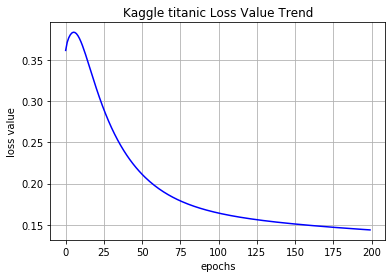

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

print(len(loss_val_list))

# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list)):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('Kaggle titanic Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()